In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
KPSS_data = pd.read_csv("KPSS_2022.csv")
cpc_data = pd.read_csv("Match_patent_cpc_2022.csv")

# merge the two data sets
merge_KPSS_cpc = KPSS_data.merge(cpc_data, how="left", on="patent_num")
#merge_KPSS_cpc.to_csv("merged_KPSS_cpc.csv")
# split long format (multiple rows for each cpc)
long_merge = merge_KPSS_cpc
long_merge['cpc'] = merge_KPSS_cpc['cpc'].str.split(';')
long_merge = merge_KPSS_cpc.explode('cpc').reset_index(drop=True)

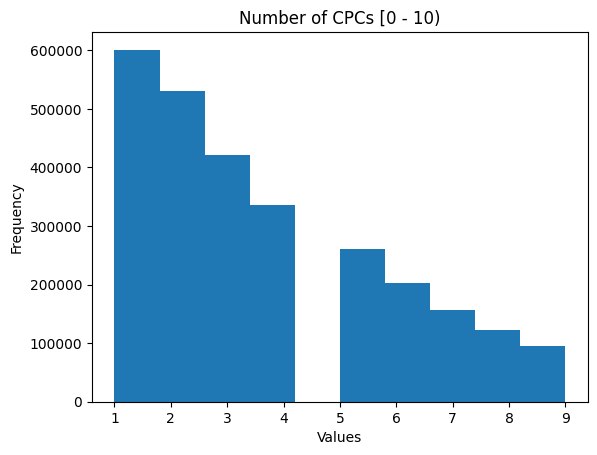

In [3]:
long_merge_count = long_merge['patent_num'].value_counts()
long_merge_count = long_merge_count.to_frame()
long_merge_count1 = long_merge_count[(long_merge_count["count"] < 10) & (long_merge_count["count"] >= 0)]
#long_merge_count1 = long_merge_count[(long_merge_count["count"] >= 200)]
                                     
plt.hist(long_merge_count1['count'])

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Number of CPCs [0 - 10)')

plt.show()

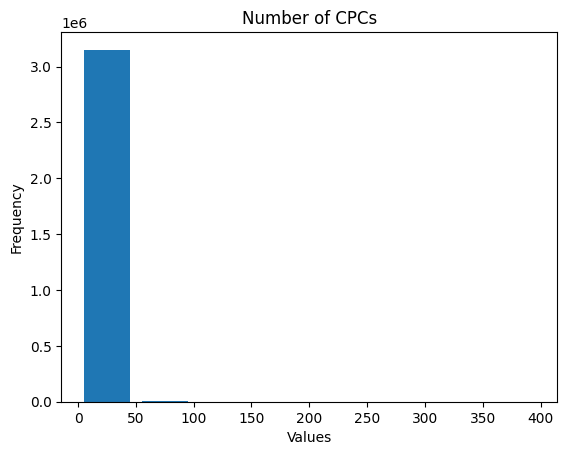

In [9]:
# create a histogram with the frequency of number of cpcs
ranges = [0, 50, 100, 150, 200, 250, 300, 350, 400]

plt.hist(long_merge_count['count'], bins=ranges, rwidth=0.8)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Number of CPCs')

plt.show()

In [87]:

pd.set_option('display.max_colwidth', None)

over_300 = long_merge_count[long_merge_count > 300].dropna()

wide_merge = over_300
cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == 7995091]['cpc'].to_string()
start_index = cpc_list.find("[") + 1
cpc_list = cpc_list[start_index::]
#cpc_list = cpc_list[1:-2]
cpc_list = cpc_list.split(", ")
print(len(cpc_list))


for i, cpc_value in enumerate(cpc_list):
   #merge_KPSS_cpc['cpc' + str(i+1)] = cpc_value
    continue
#merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == 7995091]
#merge_KPSS_cpc['cpc'].str.split(';', expand=True)


101


In [43]:
pd.set_option('display.max_colwidth', None)

over_300 = long_merge_count[long_merge_count > 300].dropna()
over_300

count
patent_num       
7995091     342.0
7562145     312.0

In [76]:
pd.set_option('display.max_colwidth', None)

cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == 7995091]['cpc'].to_frame()
# Split the values in the 'cpc' column into multiple columns
cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

# Set the prefix for the new column names
prefix = 'cpc'

# Split the string values and create new columns dynamically
max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
for i in range(1, max_cpc_values + 1):
    column_name = f'{prefix}{i}'  # Generate the new column name
    cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
cpc_list = cpc_list.drop('cpc', axis=1)
cpc_list

/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/1926677560.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/1926677560.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/1926677560.py:14: PerformanceWarning: DataFrame is

cpc1         cpc2         cpc3          cpc4       cpc5   
2081508  H04W28/24  H04L41/5022  H04L41/0604  H04L29/06027  H04N7/147  \

              cpc6         cpc7       cpc8        cpc9       cpc10  ...   
2081508  H04N7/148  H04L65/1089  H04L65/80  H04L41/046  G06F12/109  ...  \

           cpc333       cpc334      cpc335       cpc336        cpc337   
2081508  H04N5/38  H04W72/1268  H04N21/812  H04L61/2553  H04B10/25754  \

           cpc338        cpc339     cpc340     cpc341       cpc342  
2081508  H04N1/40  H04N21/42653  H04N5/907  H04W56/00  H04N21/6582  

[1 rows x 342 columns]

In [77]:
cpc_list2 = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == 7562145]['cpc'].to_frame()
# Split the values in the 'cpc' column into multiple columns
cpc_list2['cpc'] = cpc_list2['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

# Split the string values and create new columns dynamically
max_cpc_values = cpc_list2['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
for i in range(1, max_cpc_values + 1):
    column_name = f'cpc{i}'  # Generate the new column name
    cpc_list2[column_name] = cpc_list2['cpc'].str.split(', ', expand=True).iloc[:, i-1]
cpc_list2 = cpc_list2.drop('cpc', axis=1)
cpc_list2

/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/33947790.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cpc_list2[column_name] = cpc_list2['cpc'].str.split(', ', expand=True).iloc[:, i-1]
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/33947790.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cpc_list2[column_name] = cpc_list2['cpc'].str.split(', ', expand=True).iloc[:, i-1]
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/33947790.py:9: PerformanceWarning: DataFrame is high

cpc1       cpc2         cpc3          cpc4         cpc5   
1913111  H04N21/6175  H04N19/51  H04L65/1006  H01L27/14625  H04N21/4143  \

               cpc6        cpc7         cpc8          cpc9       cpc10  ...   
1913111  H04L41/042  H04N1/1935  H04N1/32106  H04N21/41415  H04N5/2257  ...  \

           cpc303     cpc304     cpc305     cpc306       cpc307    cpc308   
1913111  H04N5/45  H04W40/02  H04N5/907  H04W52/30  H04W52/0248  H04W4/12  \

                 cpc309       cpc310     cpc311    cpc312  
1913111  H04Q2213/13076  H04N21/2383  H04W8/245  H04Q3/60  

[1 rows x 312 columns]

In [78]:
# Combine tables with prioritizing non-null values
combined_table = pd.concat([cpc_list, cpc_list2])
combined_table

cpc1         cpc2         cpc3          cpc4         cpc5   
2081508    H04W28/24  H04L41/5022  H04L41/0604  H04L29/06027    H04N7/147  \
1913111  H04N21/6175    H04N19/51  H04L65/1006  H01L27/14625  H04N21/4143   

               cpc6         cpc7         cpc8          cpc9       cpc10  ...   
2081508   H04N7/148  H04L65/1089    H04L65/80    H04L41/046  G06F12/109  ...  \
1913111  H04L41/042   H04N1/1935  H04N1/32106  H04N21/41415  H04N5/2257  ...   

           cpc333       cpc334      cpc335       cpc336        cpc337   
2081508  H04N5/38  H04W72/1268  H04N21/812  H04L61/2553  H04B10/25754  \
1913111       NaN          NaN         NaN          NaN           NaN   

           cpc338        cpc339     cpc340     cpc341       cpc342  
2081508  H04N1/40  H04N21/42653  H04N5/907  H04W56/00  H04N21/6582  
1913111       NaN           NaN        NaN        NaN          NaN  

[2 rows x 342 columns]

In [79]:
over_200 = long_merge_count[(long_merge_count > 200) & (long_merge_count <= 300)].dropna()

# convert count series to a df and rename columns
over_200 = over_200.reset_index()
over_200.columns = ['patent_num', 'counts']

over_200_patent_num = over_200['patent_num'].to_list()
over_200_patent_num

for patent_num in over_200_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()
    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    cpc_list = cpc_list.drop('cpc', axis=1)
    combined_table = pd.concat([combined_table, cpc_list])
combined_table

/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/3723094094.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/3723094094.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/3723094094.py:19: PerformanceWarning: DataFrame is

cpc1         cpc2           cpc3          cpc4   
2081508       H04W28/24  H04L41/5022    H04L41/0604  H04L29/06027  \
1913111     H04N21/6175    H04N19/51    H04L65/1006  H01L27/14625   
2009567     H04N21/2383  H04N21/6582      H04N9/642     H04W36/02   
2626438  H01L2224/05181     G06F1/16      G11C5/147    H01L21/563   
2222548       H04L47/70   H04L1/0015     H04B7/2628     H04W76/12   
1947047    G11B20/10009    H04W76/45    H04L61/2553     Y02D70/40   
1995140     H04L25/4902    G06F21/74     H04N7/0112   H04L12/2697   
2127676     H04L65/1006   H04L1/0015     H04N1/1935    H04N1/1934   
1868642       H04W76/45  H04L61/2553    H04N5/23258     H04L43/50   
1744657       G06F21/74    H04W76/30      G01S5/021     H04W76/10   
2155761     G06F13/1642  G06F9/45558      H04L47/70    G06F13/385   
2459252     H04L12/5695  H04L12/4641     H04B7/2687    G06F21/305   
2062125    H04B10/25754  H04L65/1043     H04L63/126   H04L41/5035   
2257312      G06F1/1626  G06F9/45541      H04L47/14    H04J3/0658   
2398602      H04W76/027    H04L29/06  H04N2201/0094   H04L25/4904   

                cpc5           cpc6          cpc7            cpc8   
2081508    H04N7/147      H04N7/148   H04L65/1089       H04L65/80  \
1913111  H04N21/4143     H04L41/042    H04N1/1935     H04N1/32106   
2009567  H04N21/6175   H04N21/47211  H04N21/43622     H04N21/2368   
2626438  H01L23/3171      H01L24/02     H01L24/83       H01L23/60   
2222548  H04N21/4331     H04L1/0068     Y02D70/46      G06F12/109   
1947047  H04L67/1034      H04W76/30     H04N5/445      G11B27/105   
1995140  H04L65/4061     H04L25/497    H04M7/0057       G06F21/88   
2127676  H04L41/5009       H04N5/76    H04N5/2257     H04N5/23248   
1868642  H04L65/1043     H04B7/2628   H04L65/4061     H04N5/23277   
1744657    H04W76/34      H04W76/18   H04W72/1252       H04L43/50   
2155761    H04W76/12  G06F2221/2115      G06F5/08  G06F2009/45579   
2459252   H04B7/2628     H04L65/605   H04L61/2553       H04W68/00   
2062125  H04L41/5009    H04L65/4061     H04L43/50     G06F21/6209   
2257312  H04J13/0077     H04L47/824     H04N19/91     G06F21/6209   
2398602  G06F11/2007   G11B20/10425    G06F21/305      H04L25/497   

                 cpc9        cpc10  ...    cpc333       cpc334      cpc335   
2081508    H04L41/046   G06F12/109  ...  H04N5/38  H04W72/1268  H04N21/812  \
1913111  H04N21/41415   H04N5/2257  ...       NaN          NaN         NaN   
2009567   H04W52/0225  H04N21/4341  ...       NaN          NaN         NaN   
2626438     H01L24/14  H01L23/5227  ...       NaN          NaN         NaN   
2222548   H04L67/1034     H04N5/38  ...       NaN          NaN         NaN   
1947047     H04L47/70    H04W76/34  ...       NaN          NaN         NaN   
1995140   H04L25/4904  H04N7/17327  ...       NaN          NaN         NaN   
2127676    H04N5/2251     H04N1/40  ...       NaN          NaN         NaN   
1868642    H04N5/2327  H04L41/5087  ...       NaN          NaN         NaN   
1744657    H04L1/0015    G06F21/88  ...       NaN          NaN         NaN   
2155761     H04W76/18    H04W76/10  ...       NaN          NaN         NaN   
2459252     H04L51/28  H04L67/1034  ...       NaN          NaN         NaN   
2062125   H04L41/5087    H04L45/04  ...       NaN          NaN         NaN   
2257312     G06F21/74    H04W8/245  ...       NaN          NaN         NaN   
2398602     H04L9/085  H04L12/4641  ...       NaN          NaN         NaN   

              cpc336        cpc337    cpc338        cpc339     cpc340   
2081508  H04L61/2553  H04B10/25754  H04N1/40  H04N21/42653  H04N5/907  \
1913111          NaN           NaN       NaN           NaN        NaN   
2009567          NaN           NaN       NaN           NaN        NaN   
2626438          NaN           NaN       NaN           NaN        NaN   
2222548          NaN           NaN       NaN           NaN        NaN   
1947047          NaN           NaN       NaN           NaN        NaN   
1995140          NaN           NaN       NaN     

In [80]:
over_100 = long_merge_count[(long_merge_count > 100) & (long_merge_count <= 200)].dropna()

# convert count series to a df and rename columns
over_100 = over_100.reset_index()
over_100.columns = ['patent_num', 'counts']

over_100_patent_num = over_100['patent_num'].to_list()
over_100_patent_num

for patent_num in over_100_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()
    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    cpc_list = cpc_list.drop('cpc', axis=1)
    combined_table = pd.concat([combined_table, cpc_list])
combined_table

/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/1650147681.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/1650147681.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/1650147681.py:19: PerformanceWarning: DataFrame is

cpc1          cpc2          cpc3           cpc4   
2081508       H04W28/24   H04L41/5022   H04L41/0604   H04L29/06027  \
1913111     H04N21/6175     H04N19/51   H04L65/1006   H01L27/14625   
2009567     H04N21/2383   H04N21/6582     H04N9/642      H04W36/02   
2626438  H01L2224/05181      G06F1/16     G11C5/147     H01L21/563   
2222548       H04L47/70    H04L1/0015    H04B7/2628      H04W76/12   
...                 ...           ...           ...            ...   
2909378       B32B37/12   B32B2262/14  B32B2266/025  B32B2266/0214   
535762      C10M2215/14   C10M2203/06  C10M2215/226   C10M2203/024   
1237986      C10M135/12    C10M141/10  C10M2207/288     C10M137/06   
628224     C10M2207/125   C10M2207/40   C10M2207/28    C10M2207/30   
126193      C10M2207/08  C10M2209/101  C10M2207/282    C10M2211/00   

                  cpc5           cpc6           cpc7           cpc8   
2081508      H04N7/147      H04N7/148    H04L65/1089      H04L65/80  \
1913111    H04N21/4143     H04L41/042     H04N1/1935    H04N1/32106   
2009567    H04N21/6175   H04N21/47211   H04N21/43622    H04N21/2368   
2626438    H01L23/3171      H01L24/02      H01L24/83      H01L23/60   
2222548    H04N21/4331     H04L1/0068      Y02D70/46     G06F12/109   
...                ...            ...            ...            ...   
2909378  B32B2266/0228  B32B2266/0257  B32B2266/0242  B32B2266/0264   
535762    C10M2217/042   C10M2215/225     C10M159/24    C10M2215/26   
1237986     C10M129/76     C10M135/18     C10M137/02    C10M159/123   
628224    C10M2219/088    C10M2205/00   C10M2207/286    C10M2203/10   
126193        C10M1/08    C10M2211/06    C10M2215/02    C10M2211/02   

                  cpc9          cpc10  ...    cpc333       cpc334      cpc335   
2081508     H04L41/046     G06F12/109  ...  H04N5/38  H04W72/1268  H04N21/812  \
1913111   H04N21/41415     H04N5/2257  ...       NaN          NaN         NaN   
2009567    H04W52/0225    H04N21/4341  ...       NaN          NaN         NaN   
2626438      H01L24/14    H01L23/5227  ...       NaN          NaN         NaN   
2222548    H04L67/1034       H04N5/38  ...       NaN          NaN         NaN   
...                ...            ...  ...       ...          ...         ...   
2909378  B32B2266/0271  B32B2266/0278  ...       NaN          NaN         NaN   
535762    C10M2207/141    C10M2215/28  ...       NaN          NaN         NaN   
1237986     C10M129/26    C10M2207/34  ...       NaN          NaN         NaN   
628224    C10M2207/129    C10M2203/06  ...       NaN          NaN         NaN   
126193     C10M2207/06   C10M2201/062  ...       NaN          NaN         NaN   

              cpc336        cpc337    cpc338        cpc339     cpc340   
2081508  H04L61/2553  H04B10/25754  H04N1/40  H04N21/42653  H04N5/907  \
1913111          NaN           NaN       NaN           NaN        NaN   
2009567          NaN           NaN       NaN           NaN        NaN   
2626438          NaN           NaN       NaN           NaN        NaN   
2222548          NaN           NaN       NaN           NaN        NaN   
...              ...           ...       ...           ...        ...   
2909378          NaN           NaN       NaN           NaN        NaN   
535762           NaN           NaN       NaN           NaN        NaN   
1237986          NaN           NaN       NaN           NaN        NaN   
628224           NaN           NaN       NaN           NaN        NaN   
126193           NaN           NaN       NaN           NaN        NaN   

            cpc341       cpc342  
2081508  H04W56/00  H04N21/6582  
1913111        NaN          NaN  
2009567        NaN          NaN  
2626438        NaN          NaN  
2222548        NaN          NaN  
...            ...          ...  
2909378        NaN          NaN  
535762         NaN          NaN  
1237986        NaN          NaN  
628224         NaN          NaN  
126193         NaN          NaN  

[582 rows x 342 columns]

In [81]:
over_90 = long_merge_count[(long_merge_count > 90) & (long_merge_count <= 100)].dropna()

# convert count series to a df and rename columns
over_90 = over_90.reset_index()
over_90.columns = ['patent_num', 'counts']
over_90_patent_num = over_90['patent_num'].to_list()

for patent_num in over_90_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()
    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    cpc_list = cpc_list.drop('cpc', axis=1)
    combined_table = pd.concat([combined_table, cpc_list])
combined_table



/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/1226465668.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/1226465668.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_1371/1226465668.py:17: PerformanceWarning: DataFrame is

cpc1            cpc2            cpc3            cpc4   
2081508       H04W28/24     H04L41/5022     H04L41/0604    H04L29/06027  \
1913111     H04N21/6175       H04N19/51     H04L65/1006    H01L27/14625   
2009567     H04N21/2383     H04N21/6582       H04N9/642       H04W36/02   
2626438  H01L2224/05181        G06F1/16       G11C5/147      H01L21/563   
2222548       H04L47/70      H04L1/0015      H04B7/2628       H04W76/12   
...                 ...             ...             ...             ...   
2545407   A61F2002/3023  A61F2002/30574  A61F2002/30242   A61F2002/3008   
2981335  H01L2224/83424     H01L2224/97  H01L2224/92125  H01L2224/29355   
1043282     C10N2240/54     C10N2240/10     C10N2240/08     C10N2210/02   
1673082  H01L2224/48471     H01L23/5389  H01L2924/30107    H01L23/49827   
1506916     C10N2210/00     C10M2215/30      C10M163/00     C10M2215/28   

                   cpc5            cpc6            cpc7            cpc8   
2081508       H04N7/147       H04N7/148     H04L65/1089       H04L65/80  \
1913111     H04N21/4143      H04L41/042      H04N1/1935     H04N1/32106   
2009567     H04N21/6175    H04N21/47211    H04N21/43622     H04N21/2368   
2626438     H01L23/3171       H01L24/02       H01L24/83       H01L23/60   
2222548     H04N21/4331      H04L1/0068       Y02D70/46      G06F12/109   
...                 ...             ...             ...             ...   
2545407  A61F2002/30369  A61F2002/30014      A61F2/4684       A61F2/442   
2981335  H01L2224/29387  H01L2224/83493  H01L2224/83447  H01L2225/06513   
1043282    C10M2227/061    C10M2219/087       C07C57/13    C10M2223/065   
1673082    H01L23/49811  H01L2224/05647       H01L24/48       H01L24/05   
1506916      C10M135/36    C10M2207/262    C10M2207/024    C10M2219/087   

                   cpc9           cpc10  ...    cpc333       cpc334   
2081508      H04L41/046      G06F12/109  ...  H04N5/38  H04W72/1268  \
1913111    H04N21/41415      H04N5/2257  ...       NaN          NaN   
2009567     H04W52/0225     H04N21/4341  ...       NaN          NaN   
2626438       H01L24/14     H01L23/5227  ...       NaN          NaN   
2222548     H04L67/1034        H04N5/38  ...       NaN          NaN   
...                 ...             ...  ...       ...          ...   
2545407  A61F2002/30311  A61F2002/30016  ...       NaN          NaN   
2981335  H01L2224/92122   H01L2224/8321  ...       NaN          NaN   
1043282    C10M2219/083     C10N2240/06  ...       NaN          NaN   
1673082  H01L2224/85447  H01L2224/85051  ...       NaN          NaN   
1506916    C10M2207/289     C10N2240/10  ...       NaN          NaN   

             cpc335       cpc336        cpc337    cpc338        cpc339   
2081508  H04N21/812  H04L61/2553  H04B10/25754  H04N1/40  H04N21/42653  \
1913111         NaN          NaN           NaN       NaN           NaN   
2009567         NaN          NaN           NaN       NaN           NaN   
2626438         NaN          NaN           NaN       NaN           NaN   
2222548         NaN          NaN           NaN       NaN           NaN   
...             ...          ...           ...       ...           ...   
2545407         NaN          NaN           NaN       NaN           NaN   
2981335         NaN          NaN           NaN       NaN           NaN   
1043282         NaN          NaN           NaN       NaN           NaN   
1673082         NaN          NaN           NaN       NaN           NaN   
1506916         NaN          NaN           NaN       NaN           NaN   

            cpc340     cpc341       cpc342  
2081508  H04N5/907  H04W56/00  H04N21/6582  
1913111        NaN        NaN          NaN  
2009567        NaN        NaN          NaN  
2626438        NaN        NaN          NaN  
2222548        NaN        NaN          NaN  
...            ...        ...          ...  
2545407        NaN        NaN          NaN  
2981335        NaN        NaN          NaN  
1043282        NaN        NaN          NaN  
1673082        NaN       

In [82]:
over_80 = long_merge_count[(long_merge_count > 80) & (long_merge_count <= 90)].dropna()

# convert count series to a df and rename columns
over_80 = over_80.reset_index()
over_80.columns = ['patent_num', 'counts']
over_80_patent_num = over_80['patent_num'].to_list()

for patent_num in over_80_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()
    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    cpc_list = cpc_list.drop('cpc', axis=1)
    combined_table = pd.concat([combined_table, cpc_list])
combined_table


cpc1            cpc2            cpc3            cpc4   
2081508       H04W28/24     H04L41/5022     H04L41/0604    H04L29/06027  \
1913111     H04N21/6175       H04N19/51     H04L65/1006    H01L27/14625   
2009567     H04N21/2383     H04N21/6582       H04N9/642       H04W36/02   
2626438  H01L2224/05181        G06F1/16       G11C5/147      H01L21/563   
2222548       H04L47/70      H04L1/0015      H04B7/2628       H04W76/12   
...                 ...             ...             ...             ...   
505935     C10M2207/282    C10M2215/042       C10L10/18      C10M133/52   
2891559  H01L2224/83192  H01L2924/00015    H01L2224/411  H01L2224/73271   
676612      C10M2209/00    C10M2207/142     C10M2207/34    C10M2209/106   
3085252  H01L2224/13012  H01L2224/13672  H01L2224/13671  H01L2224/13664   
2004437       H01L24/83   H01L2224/8385  H01L2224/48091  H01L2224/49171   

                   cpc5            cpc6            cpc7            cpc8   
2081508       H04N7/147       H04N7/148     H04L65/1089       H04L65/80  \
1913111     H04N21/4143      H04L41/042      H04N1/1935     H04N1/32106   
2009567     H04N21/6175    H04N21/47211    H04N21/43622     H04N21/2368   
2626438     H01L23/3171       H01L24/02       H01L24/83       H01L23/60   
2222548     H04N21/4331      H04L1/0068       Y02D70/46      G06F12/109   
...                 ...             ...             ...             ...   
505935      C10M2205/00     C10M2223/06     C10M2203/02    C10M2203/102   
2891559  H01L2224/83851  H01L2224/83815   H01L2224/8391   H01L2224/8485   
676612     C10M2203/104    C10M2209/104        C08K5/55     C10M2207/22   
3085252  H01L2224/13657  H01L2224/13655  H01L2224/13644  H01L2224/13582   
2004437       H01L23/50  H01L2224/32188  H01L2224/48228       H01L24/32   

                   cpc9           cpc10  ...    cpc333       cpc334   
2081508      H04L41/046      G06F12/109  ...  H04N5/38  H04W72/1268  \
1913111    H04N21/41415      H04N5/2257  ...       NaN          NaN   
2009567     H04W52/0225     H04N21/4341  ...       NaN          NaN   
2626438       H01L24/14     H01L23/5227  ...       NaN          NaN   
2222548     H04L67/1034        H04N5/38  ...       NaN          NaN   
...                 ...             ...  ...       ...          ...   
505935     C10M2205/024     C10M2203/06  ...       NaN          NaN   
2891559  H01L2224/48105  H01L2224/49105  ...       NaN          NaN   
676612      C10M2207/16     C10M2207/24  ...       NaN          NaN   
3085252  H01L2224/13144  H01L2224/13147  ...       NaN          NaN   
2004437  H01L2924/01047  H01L2224/73253  ...       NaN          NaN   

             cpc335       cpc336        cpc337    cpc338        cpc339   
2081508  H04N21/812  H04L61/2553  H04B10/25754  H04N1/40  H04N21/42653  \
1913111         NaN          NaN           NaN       NaN           NaN   
2009567         NaN          NaN           NaN       NaN           NaN   
2626438         NaN          NaN           NaN       NaN           NaN   
2222548         NaN          NaN           NaN       NaN           NaN   
...             ...          ...           ...       ...           ...   
505935          NaN          NaN           NaN       NaN           NaN   
2891559         NaN          NaN           NaN       NaN           NaN   
676612          NaN          NaN           NaN       NaN           NaN   
3085252         NaN          NaN           NaN       NaN           NaN   
2004437         NaN          NaN           NaN       NaN           NaN   

            cpc340     cpc341       cpc342  
2081508  H04N5/907  H04W56/00  H04N21/6582  
1913111        NaN        NaN          NaN  
2009567        NaN        NaN          NaN  
2626438        NaN        NaN          NaN  
2222548        NaN        NaN          NaN  
...            ...        ...          ...  
505935         NaN        NaN          NaN  
2891559        NaN        NaN          NaN  
676612         NaN        NaN          NaN  
3085252        NaN       

In [83]:
over_70 = long_merge_count[(long_merge_count > 70) & (long_merge_count <= 80)].dropna()

# convert count series to a df and rename columns
over_70 = over_70.reset_index()
over_70.columns = ['patent_num', 'counts']
over_70_patent_num = over_70['patent_num'].to_list()

for patent_num in over_70_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()
    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    cpc_list = cpc_list.drop('cpc', axis=1)
    combined_table = pd.concat([combined_table, cpc_list])
combined_table

cpc1          cpc2            cpc3            cpc4   
2081508       H04W28/24   H04L41/5022     H04L41/0604    H04L29/06027  \
1913111     H04N21/6175     H04N19/51     H04L65/1006    H01L27/14625   
2009567     H04N21/2383   H04N21/6582       H04N9/642       H04W36/02   
2626438  H01L2224/05181      G06F1/16       G11C5/147      H01L21/563   
2222548       H04L47/70    H04L1/0015      H04B7/2628       H04W76/12   
...                 ...           ...             ...             ...   
2901941       H04L67/42      H04W4/60        H04W4/38       H04W4/025   
2422597       C07F9/509    C07F9/5072       C07F9/505      C07C253/14   
1680579  H01L2924/01006  H01L2924/207  H01L2224/85424  H01L2224/85444   
2925494      G06F16/254     G06N20/00     G06F16/2237     G06F16/2264   
2702666      H01M2/0287     H01M2/029      B29C66/433       B29C66/41   

                   cpc5           cpc6           cpc7            cpc8   
2081508       H04N7/147      H04N7/148    H04L65/1089       H04L65/80  \
1913111     H04N21/4143     H04L41/042     H04N1/1935     H04N1/32106   
2009567     H04N21/6175   H04N21/47211   H04N21/43622     H04N21/2368   
2626438     H01L23/3171      H01L24/02      H01L24/83       H01L23/60   
2222548     H04N21/4331     H04L1/0068      Y02D70/46      G06F12/109   
...                 ...            ...            ...             ...   
2901941       H04W4/023       H04W4/80      H04W12/06     H04L41/0823   
2422597      C07F9/4021  B01J2531/0205      C07C1/321      C07D213/76   
1680579  H01L2224/85455      H01L23/66  H01L2224/8547  H01L2224/45015   
2925494      G06F16/248    G06F16/2423      G06F17/15      G06F16/258   
2702666   H01M2300/0037    B29C66/1122      B29C65/18    B29C66/72321   

                   cpc9           cpc10  ...    cpc333       cpc334   
2081508      H04L41/046      G06F12/109  ...  H04N5/38  H04W72/1268  \
1913111    H04N21/41415      H04N5/2257  ...       NaN          NaN   
2009567     H04W52/0225     H04N21/4341  ...       NaN          NaN   
2626438       H01L24/14     H01L23/5227  ...       NaN          NaN   
2222548     H04L67/1034        H04N5/38  ...       NaN          NaN   
...                 ...             ...  ...       ...          ...   
2901941       H04L67/10      H04L65/403  ...       NaN          NaN   
2422597      C07D239/54      C07C17/361  ...       NaN          NaN   
1680579  H01L2924/01015  H01L2224/05599  ...       NaN          NaN   
2925494      G06F16/283      G06F16/288  ...       NaN          NaN   
2702666       B29C65/08     B29K2077/00  ...       NaN          NaN   

             cpc335       cpc336        cpc337    cpc338        cpc339   
2081508  H04N21/812  H04L61/2553  H04B10/25754  H04N1/40  H04N21/42653  \
1913111         NaN          NaN           NaN       NaN           NaN   
2009567         NaN          NaN           NaN       NaN           NaN   
2626438         NaN          NaN           NaN       NaN           NaN   
2222548         NaN          NaN           NaN       NaN           NaN   
...             ...          ...           ...       ...           ...   
2901941         NaN          NaN           NaN       NaN           NaN   
2422597         NaN          NaN           NaN       NaN           NaN   
1680579         NaN          NaN           NaN       NaN           NaN   
2925494         NaN          NaN           NaN       NaN           NaN   
2702666         NaN          NaN           NaN       NaN           NaN   

            cpc340     cpc341       cpc342  
2081508  H04N5/907  H04W56/00  H04N21/6582  
1913111        NaN        NaN          NaN  
2009567        NaN        NaN          NaN  
2626438        NaN        NaN          NaN  
2222548        NaN        NaN          NaN  
...            ...        ...          ...  
2901941        NaN        NaN          NaN  
2422597        NaN        NaN          NaN  
1680579        NaN        NaN          NaN  
2925494        NaN        NaN          NaN  
2702666        NaN        Na

In [84]:
over_60 = long_merge_count[(long_merge_count > 60) & (long_merge_count <= 70)].dropna()

# convert count series to a df and rename columns
over_60 = over_60.reset_index()
over_60.columns = ['patent_num', 'counts']
over_60_patent_num = over_60['patent_num'].to_list()

for patent_num in over_60_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()
    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    cpc_list = cpc_list.drop('cpc', axis=1)
    combined_table = pd.concat([combined_table, cpc_list])
combined_table = combined_table.drop_duplicates()
combined_table

cpc1            cpc2            cpc3            cpc4   
2081508       H04W28/24     H04L41/5022     H04L41/0604    H04L29/06027  \
1913111     H04N21/6175       H04N19/51     H04L65/1006    H01L27/14625   
2009567     H04N21/2383     H04N21/6582       H04N9/642       H04W36/02   
2626438  H01L2224/05181        G06F1/16       G11C5/147      H01L21/563   
2222548       H04L47/70      H04L1/0015      H04B7/2628       H04W76/12   
...                 ...             ...             ...             ...   
1865156    G09G2340/125   G09G2340/0428    G09G2360/125       H04N5/126   
1872417  H01L2924/13091  H01L2924/01023  H01L2924/01082  H01L2924/01079   
2599725       A61B18/14       A61B34/25     A61B18/1445    H02J2007/005   
1867011  A61B2018/00119  A61B2018/00577  A61B2017/00292  A61B2018/00083   
1887055    G06Q20/40145        G07F7/12     G06F12/1408     G06Q20/1235   

                   cpc5            cpc6            cpc7            cpc8   
2081508       H04N7/147       H04N7/148     H04L65/1089       H04L65/80  \
1913111     H04N21/4143      H04L41/042      H04N1/1935     H04N1/32106   
2009567     H04N21/6175    H04N21/47211    H04N21/43622     H04N21/2368   
2626438     H01L23/3171       H01L24/02       H01L24/83       H01L23/60   
2222548     H04N21/4331      H04L1/0068       Y02D70/46      G06F12/109   
...                 ...             ...             ...             ...   
1865156    G09G2360/121      H04N11/143        G09G5/06       H04N11/20   
1872417    H01L2924/014  H01L2224/37147  H01L2924/19043  H01L2224/05554   
2599725  A61B2017/00477    Y10T29/53913  A61B2018/00607       A61B18/12   
1867011  A61B2017/22001  A61B2017/22038   A61B2018/1253  A61B2017/00247   
1887055      G07F7/1008       G06T1/005      G07D7/0013      G10L19/018   

                   cpc9           cpc10  ...    cpc333       cpc334   
2081508      H04L41/046      G06F12/109  ...  H04N5/38  H04W72/1268  \
1913111    H04N21/41415      H04N5/2257  ...       NaN          NaN   
2009567     H04W52/0225     H04N21/4341  ...       NaN          NaN   
2626438       H01L24/14     H01L23/5227  ...       NaN          NaN   
2222548     H04L67/1034        H04N5/38  ...       NaN          NaN   
...                 ...             ...  ...       ...          ...   
1865156     G09G2340/06    G09G2360/126  ...       NaN          NaN   
1872417  H01L2224/05624       H01L24/91  ...       NaN          NaN   
2599725       A61B18/00     A61B18/1442  ...       NaN          NaN   
1867011  A61B2018/00827  A61B2018/00761  ...       NaN          NaN   
1887055       H04B1/665       G07F7/086  ...       NaN          NaN   

             cpc335       cpc336        cpc337    cpc338        cpc339   
2081508  H04N21/812  H04L61/2553  H04B10/25754  H04N1/40  H04N21/42653  \
1913111         NaN          NaN           NaN       NaN           NaN   
2009567         NaN          NaN           NaN       NaN           NaN   
2626438         NaN          NaN           NaN       NaN           NaN   
2222548         NaN          NaN           NaN       NaN           NaN   
...             ...          ...           ...       ...           ...   
1865156         NaN          NaN           NaN       NaN           NaN   
1872417         NaN          NaN           NaN       NaN           NaN   
2599725         NaN          NaN           NaN       NaN           NaN   
1867011         NaN          NaN           NaN       NaN           NaN   
1887055         NaN          NaN           NaN       NaN           NaN   

            cpc340     cpc341       cpc342  
2081508  H04N5/907  H04W56/00  H04N21/6582  
1913111        NaN        NaN          NaN  
2009567        NaN        NaN          NaN  
2626438        NaN        NaN          NaN  
2222548        NaN        NaN          NaN  
...            ...        ...          ...  
1865156        NaN        NaN          NaN  
1872417        NaN        NaN          NaN  
2599725        NaN        NaN          NaN  
1867011        NaN       

In [85]:
over_50 = long_merge_count[(long_merge_count > 50) & (long_merge_count <= 60)].dropna()

# convert count series to a df and rename columns
over_50 = over_50.reset_index()
over_50.columns = ['patent_num', 'counts']
over_50_patent_num = over_50['patent_num'].to_list()

for patent_num in over_50_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()
    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    cpc_list = cpc_list.drop('cpc', axis=1)
    combined_table = pd.concat([combined_table, cpc_list])
combined_table

cpc1            cpc2            cpc3          cpc4   
2081508       H04W28/24     H04L41/5022     H04L41/0604  H04L29/06027  \
1913111     H04N21/6175       H04N19/51     H04L65/1006  H01L27/14625   
2009567     H04N21/2383     H04N21/6582       H04N9/642     H04W36/02   
2626438  H01L2224/05181        G06F1/16       G11C5/147    H01L21/563   
2222548       H04L47/70      H04L1/0015      H04B7/2628     H04W76/12   
...                 ...             ...             ...           ...   
2542752       H01L24/20       H01L24/11      H01L23/585    H01L23/544   
1731831   A61B2017/1107      A61B17/064    A61B17/06061   A61B17/0469   
1120471  H01L2924/01047  H01L2924/10253  H01L2224/73265  H01L23/49589   
3062728      G06F9/5022     H04L47/2458      H04L69/162    G06F3/0604   
1765453    H04L29/12783      H04L67/104      H04L63/105     H04L61/20   

                 cpc5          cpc6          cpc7            cpc8   
2081508     H04N7/147     H04N7/148   H04L65/1089       H04L65/80  \
1913111   H04N21/4143    H04L41/042    H04N1/1935     H04N1/32106   
2009567   H04N21/6175  H04N21/47211  H04N21/43622     H04N21/2368   
2626438   H01L23/3171     H01L24/02     H01L24/83       H01L23/60   
2222548   H04N21/4331    H04L1/0068     Y02D70/46      G06F12/109   
...               ...           ...           ...             ...   
2542752   H01L25/0657  H01L21/76898     H01L24/81  H01L2224/16145   
1731831     A61B19/22     A61B17/11   A61B17/0218   A61B17/320016   
1120471  H01L23/49537    H01L23/647    H01L23/642  H01L2924/01005   
3062728    G06F3/0631    G06F3/0644    G06F3/0673     G06F9/45558   
1765453     H04L51/00     G06Q30/02   H04L67/1044       H04L12/58   

                   cpc9           cpc10  ...    cpc333       cpc334   
2081508      H04L41/046      G06F12/109  ...  H04N5/38  H04W72/1268  \
1913111    H04N21/41415      H04N5/2257  ...       NaN          NaN   
2009567     H04W52/0225     H04N21/4341  ...       NaN          NaN   
2626438       H01L24/14     H01L23/5227  ...       NaN          NaN   
2222548     H04L67/1034        H04N5/38  ...       NaN          NaN   
...                 ...             ...  ...       ...          ...   
2542752      H01L25/105      H01L23/481  ...       NaN          NaN   
1731831  A61B2017/00287       A61B17/54  ...       NaN          NaN   
1120471  H01L2924/01073  H01L2224/48472  ...       NaN          NaN   
3062728      G06F9/4881      G06F9/5016  ...       NaN          NaN   
1765453    H04L29/12452     H04L61/1541  ...       NaN          NaN   

             cpc335       cpc336        cpc337    cpc338        cpc339   
2081508  H04N21/812  H04L61/2553  H04B10/25754  H04N1/40  H04N21/42653  \
1913111         NaN          NaN           NaN       NaN           NaN   
2009567         NaN          NaN           NaN       NaN           NaN   
2626438         NaN          NaN           NaN       NaN           NaN   
2222548         NaN          NaN           NaN       NaN           NaN   
...             ...          ...           ...       ...           ...   
2542752         NaN          NaN           NaN       NaN           NaN   
1731831         NaN          NaN           NaN       NaN           NaN   
1120471         NaN          NaN           NaN       NaN           NaN   
3062728         NaN          NaN           NaN       NaN           NaN   
1765453         NaN          NaN           NaN       NaN           NaN   

            cpc340     cpc341       cpc342  
2081508  H04N5/907  H04W56/00  H04N21/6582  
1913111        NaN        NaN          NaN  
2009567        NaN        NaN          NaN  
2626438        NaN        NaN          NaN  
2222548        NaN        NaN          NaN  
...            ...        ...          ...  
2542752        NaN        NaN          NaN  
1731831        NaN        NaN          NaN  
1120471        NaN        NaN          NaN  
3062728        NaN        NaN          NaN  
1765453        NaN        NaN          NaN  

[8438 rows x 342 columns]

In [86]:
over_40 = long_merge_count[(long_merge_count > 40) & (long_merge_count <= 50)].dropna()

# convert count series to a df and rename columns
over_40 = over_40.reset_index()
over_40.columns = ['patent_num', 'counts']
over_40_patent_num = over_40['patent_num'].to_list()

for patent_num in over_40_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()
    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    cpc_list = cpc_list.drop('cpc', axis=1)
    combined_table = pd.concat([combined_table, cpc_list])
combined_table

cpc1            cpc2            cpc3           cpc4   
2081508       H04W28/24     H04L41/5022     H04L41/0604   H04L29/06027  \
1913111     H04N21/6175       H04N19/51     H04L65/1006   H01L27/14625   
2009567     H04N21/2383     H04N21/6582       H04N9/642      H04W36/02   
2626438  H01L2224/05181        G06F1/16       G11C5/147     H01L21/563   
2222548       H04L47/70      H04L1/0015      H04B7/2628      H04W76/12   
...                 ...             ...             ...            ...   
1574488       G06F13/28      G06F9/3869      G06F13/385     G06F1/3203   
1759914   Y10T428/31743   Y10T428/31725   Y10T428/31728  Y10T428/31917   
2418344    H01L23/49827  H01L2224/32145  H01L2224/16225   H01L23/49531   
2945457     A63B2220/18     A63B2220/17       H02J50/20      H02J50/90   
1166405     C08F2500/20      C07C51/373      C08F210/14     C07C49/747   

                  cpc5            cpc6            cpc7           cpc8   
2081508      H04N7/147       H04N7/148     H04L65/1089      H04L65/80  \
1913111    H04N21/4143      H04L41/042      H04N1/1935    H04N1/32106   
2009567    H04N21/6175    H04N21/47211    H04N21/43622    H04N21/2368   
2626438    H01L23/3171       H01L24/02       H01L24/83      H01L23/60   
2222548    H04N21/4331      H04L1/0068       Y02D70/46     G06F12/109   
...                ...             ...             ...            ...   
1574488    G06F12/0842      G06F1/3296        G06F1/08     G06F9/4843   
1759914  Y10T428/31931   Y10T428/31938   Y10T428/31935  Y10T428/31924   
2418344    H01L23/3128  H01L2225/06513  H01L2224/48247     H01L21/568   
2945457     H05K999/99    A63B2071/063   A63B2071/0625    A63B2207/02   
1166405     C07F7/2212      B01J31/143      C07C13/567     C07C63/331   

                   cpc9        cpc10  ...    cpc333       cpc334      cpc335   
2081508      H04L41/046   G06F12/109  ...  H04N5/38  H04W72/1268  H04N21/812  \
1913111    H04N21/41415   H04N5/2257  ...       NaN          NaN         NaN   
2009567     H04W52/0225  H04N21/4341  ...       NaN          NaN         NaN   
2626438       H01L24/14  H01L23/5227  ...       NaN          NaN         NaN   
2222548     H04L67/1034     H04N5/38  ...       NaN          NaN         NaN   
...                 ...          ...  ...       ...          ...         ...   
1574488     G06F12/0859  Y02B60/1235  ...       NaN          NaN         NaN   
1759914   Y10T428/24826     B32B7/10  ...       NaN          NaN         NaN   
2418344  H01L2225/06568    H01L24/16  ...       NaN          NaN         NaN   
2945457   A63B2071/0602     H02J7/32  ...       NaN          NaN         NaN   
1166405       Y02P20/52  C08F2500/12  ...       NaN          NaN         NaN   

              cpc336        cpc337    cpc338        cpc339     cpc340   
2081508  H04L61/2553  H04B10/25754  H04N1/40  H04N21/42653  H04N5/907  \
1913111          NaN           NaN       NaN           NaN        NaN   
2009567          NaN           NaN       NaN           NaN        NaN   
2626438          NaN           NaN       NaN           NaN        NaN   
2222548          NaN           NaN       NaN           NaN        NaN   
...              ...           ...       ...           ...        ...   
1574488          NaN           NaN       NaN           NaN        NaN   
1759914          NaN           NaN       NaN           NaN        NaN   
2418344          NaN           NaN       NaN           NaN        NaN   
2945457          NaN           NaN       NaN           NaN        NaN   
1166405          NaN           NaN       NaN           NaN        NaN   

            cpc341       cpc342  
2081508  H04W56/00  H04N21/6582  
1913111        NaN          NaN  
2009567        NaN          NaN  
2626438        NaN          NaN  
2222548        NaN          NaN  
...            ...          ...  
1574488        NaN          NaN  
1759914        NaN          NaN  
2418344        NaN          NaN  
2945457        NaN          NaN  
1166405        NaN          NaN  

[16430

In [87]:
over_30 = long_merge_count[(long_merge_count > 30) & (long_merge_count <= 40)].dropna()

# convert count series to a df and rename columns
over_30 = over_30.reset_index()
over_30.columns = ['patent_num', 'counts']
over_30_patent_num = over_30['patent_num'].to_list()

for patent_num in over_30_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()
    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    cpc_list = cpc_list.drop('cpc', axis=1)
    combined_table = pd.concat([combined_table, cpc_list])
combined_table

cpc1           cpc2           cpc3          cpc4   
2081508       H04W28/24    H04L41/5022    H04L41/0604  H04L29/06027  \
1913111     H04N21/6175      H04N19/51    H04L65/1006  H01L27/14625   
2009567     H04N21/2383    H04N21/6582      H04N9/642     H04W36/02   
2626438  H01L2224/05181       G06F1/16      G11C5/147    H01L21/563   
2222548       H04L47/70     H04L1/0015     H04B7/2628     H04W76/12   
...                 ...            ...            ...           ...   
3149053     C07K2319/00  C12Y305/01015  C12Y304/14009  C12Y302/0102   
2326053      Y10T442/30    Y10T442/638     Y10T442/60      D02J1/22   
3021090       H01Q1/288      H01Q3/247       H01Q3/40      H01Q5/50   
1268672        C22B4/08     C22B34/129     B01J19/088     C22B4/005   
2651879    B60L2240/545    B60L2260/52     Y02T90/162    Y02T90/127   

                   cpc5            cpc6            cpc7            cpc8   
2081508       H04N7/147       H04N7/148     H04L65/1089       H04L65/80  \
1913111     H04N21/4143      H04L41/042      H04N1/1935     H04N1/32106   
2009567     H04N21/6175    H04N21/47211    H04N21/43622     H04N21/2368   
2626438     H01L23/3171       H01L24/02       H01L24/83       H01L23/60   
2222548     H04N21/4331      H04L1/0068       Y02D70/46      G06F12/109   
...                 ...             ...             ...             ...   
3149053  C12N2750/14171  C12N2750/14143  C12N2750/14142  C12N2750/14141   
2326053      Y10T442/69     Y10T442/681        D04B1/16     Y10T442/689   
3021090      H01Q19/132     H04B7/18513     H01Q21/0025        H01Q1/06   
1268672       C01B7/035       C07C11/24      Y02P20/582       C01B3/342   
2651879     Y02T10/7005    B60L2240/443    B60L2240/642     B60L15/2045   

                 cpc9         cpc10  ...    cpc333       cpc334      cpc335   
2081508    H04L41/046    G06F12/109  ...  H04N5/38  H04W72/1268  H04N21/812  \
1913111  H04N21/41415    H04N5/2257  ...       NaN          NaN         NaN   
2009567   H04W52/0225   H04N21/4341  ...       NaN          NaN         NaN   
2626438     H01L24/14   H01L23/5227  ...       NaN          NaN         NaN   
2222548   H04L67/1034      H04N5/38  ...       NaN          NaN         NaN   
...               ...           ...  ...       ...          ...         ...   
3149053   C12N2330/51  C12N2310/141  ...       NaN          NaN         NaN   
2326053  Y10T428/2929      D04H1/42  ...       NaN          NaN         NaN   
3021090    H04B7/0617   H04B7/18515  ...       NaN          NaN         NaN   
1268672   C01P2004/64      C07C2/76  ...       NaN          NaN         NaN   
2651879  B60L2240/549  B60L2240/547  ...       NaN          NaN         NaN   

              cpc336        cpc337    cpc338        cpc339     cpc340   
2081508  H04L61/2553  H04B10/25754  H04N1/40  H04N21/42653  H04N5/907  \
1913111          NaN           NaN       NaN           NaN        NaN   
2009567          NaN           NaN       NaN           NaN        NaN   
2626438          NaN           NaN       NaN           NaN        NaN   
2222548          NaN           NaN       NaN           NaN        NaN   
...              ...           ...       ...           ...        ...   
3149053          NaN           NaN       NaN           NaN        NaN   
2326053          NaN           NaN       NaN           NaN        NaN   
3021090          NaN           NaN       NaN           NaN        NaN   
1268672          NaN           NaN       NaN           NaN        NaN   
2651879          NaN           NaN       NaN           NaN        NaN   

            cpc341       cpc342  
2081508  H04W56/00  H04N21/6582  
1913111        NaN          NaN  
2009567        NaN          NaN  
2626438        NaN          NaN  
2222548        NaN          NaN  
...            ...          ...  
3149053        NaN          NaN  
2326053        NaN          NaN  
3021090        NaN          NaN  
1268672        NaN          NaN  
2651879        NaN          NaN  

[33664 rows x 342 columns]

In [88]:
over_20 = long_merge_count[(long_merge_count > 20) & (long_merge_count <= 30)].dropna()

# convert count series to a df and rename columns
over_20 = over_20.reset_index()
over_20.columns = ['patent_num', 'counts']
over_20_patent_num = over_20['patent_num'].to_list()

for patent_num in over_20_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()
    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    cpc_list = cpc_list.drop('cpc', axis=1)
    combined_table = pd.concat([combined_table, cpc_list])
combined_table = combined_table.drop_duplicates()
combined_table

KeyboardInterrupt: 

In [89]:
combined_table.to_csv("over_20.csv")

In [4]:
# do everything 20 on manually?
table_20 = long_merge_count[(long_merge_count == 11)].dropna()

# Convert count series to a DataFrame and rename columns
table_20 = table_20.reset_index()
table_20.columns = ['patent_num', 'counts']
table_20_patent_num = table_20['patent_num'].to_list()

new_table = pd.DataFrame()  # Create an empty DataFrame to store the new table

for patent_num in table_20_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()

    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    
    # Create new columns for each CPC value
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list["patent_num"] = patent_num
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    
    # Append the extracted CPC values to the new table
    new_table = pd.concat([new_table, cpc_list.drop('cpc', axis=1)], ignore_index=True)
new_table

patent_num            cpc1            cpc2           cpc3   
0        10525962     B60W2720/40       B60W30/02      B60W40/10  \
1         6433676   B60R2011/0033     B60R11/0241      B60R11/02   
2         6519505     B65H2557/24     B65H2551/15    B65H2220/01   
3         3373189       B01J21/18       B01J23/40    B01J2231/70   
4         6518219     B01J35/1019     B01J35/1042    B01J35/0026   
...           ...             ...             ...            ...   
59304     7472833    G06K19/07703    G06Q20/40145    G06K19/0718   
59305     7519061      H04M1/2535    H04L29/12216      H04M7/006   
59306     7545834        H03F3/72  H03F2203/45702  H04Q2213/1302   
59307     9711386  H05K2201/09254    H05K2201/017  H05K2203/1338   
59308     9707974     B60W2520/10      G09B19/167    B60W2540/28   

                 cpc4            cpc5           cpc6           cpc7   
0        B60W2510/205     B60W2540/16      B60W10/11   B60W30/18145  \
1         B60R11/0247   G02B2027/0118   G02B2027/012  B60R2011/0026   
2      B65H2701/12112     B65H2220/02      A47K10/36    A47K10/3625   
3          C07C67/055       B01J31/04      B01J27/06    B01J31/1616   
4         B01J35/1038      B01J35/108      C10G45/08     B01J37/033   
...               ...             ...            ...            ...   
59304     G06Q20/3576     G06K19/0719     G06Q20/341    G06Q20/4014   
59305     H04L61/2092       H04M1/723   H04L29/06027    H04L61/6004   
59306  H03F2203/45726  H04Q2213/13305  H04Q2213/1332      H03F3/211   
59307     H01L21/6833       H05K3/285     H05K1/0306      H05K1/162   
59308       B60W50/14    B60W2720/106    B60W2540/30    B60W2530/14   

                 cpc8           cpc9          cpc10           cpc11  
0           B60W10/18      B60W10/04     B60W30/045     B60W2540/10  
1         H04R2499/13       B60R1/12       G02B6/00     B60R11/0217  
2           B65H26/06  B65H2701/1924    B65H2511/30     A47K10/3612  
3           C07C69/15      B01J23/44      C07C69/01       B01J31/30  
4           B01J21/04      B01J23/85      B01J35/10     B01J35/1061  
...               ...            ...            ...             ...  
59304     G06K19/0723      G06Q20/40     G06Q20/227      G07F7/1008  
59305     H04L65/1069    H04L29/1232    H04L61/2007    H04L29/12801  
59306  H04Q2213/13292    H03F3/45197  H04Q2213/1304     H03F3/45183  
59307   H05K2203/0195   Y10T29/49155   H05K2201/068  H05K2201/09236  
59308       B60W40/09   B60W2550/143   B60W2540/106       B60W30/02  

[59309 rows x 12 columns]

In [5]:
# concat table 20 with table 21
#cpc_20s = pd.read_csv("cpc_20.csv")
#table_concat = pd.concat([new_table, cpc_20s], ignore_index=True)

table_concat = new_table
table_concat

patent_num            cpc1            cpc2           cpc3   
0        10525962     B60W2720/40       B60W30/02      B60W40/10  \
1         6433676   B60R2011/0033     B60R11/0241      B60R11/02   
2         6519505     B65H2557/24     B65H2551/15    B65H2220/01   
3         3373189       B01J21/18       B01J23/40    B01J2231/70   
4         6518219     B01J35/1019     B01J35/1042    B01J35/0026   
...           ...             ...             ...            ...   
59304     7472833    G06K19/07703    G06Q20/40145    G06K19/0718   
59305     7519061      H04M1/2535    H04L29/12216      H04M7/006   
59306     7545834        H03F3/72  H03F2203/45702  H04Q2213/1302   
59307     9711386  H05K2201/09254    H05K2201/017  H05K2203/1338   
59308     9707974     B60W2520/10      G09B19/167    B60W2540/28   

                 cpc4            cpc5           cpc6           cpc7   
0        B60W2510/205     B60W2540/16      B60W10/11   B60W30/18145  \
1         B60R11/0247   G02B2027/0118   G02B2027/012  B60R2011/0026   
2      B65H2701/12112     B65H2220/02      A47K10/36    A47K10/3625   
3          C07C67/055       B01J31/04      B01J27/06    B01J31/1616   
4         B01J35/1038      B01J35/108      C10G45/08     B01J37/033   
...               ...             ...            ...            ...   
59304     G06Q20/3576     G06K19/0719     G06Q20/341    G06Q20/4014   
59305     H04L61/2092       H04M1/723   H04L29/06027    H04L61/6004   
59306  H03F2203/45726  H04Q2213/13305  H04Q2213/1332      H03F3/211   
59307     H01L21/6833       H05K3/285     H05K1/0306      H05K1/162   
59308       B60W50/14    B60W2720/106    B60W2540/30    B60W2530/14   

                 cpc8           cpc9          cpc10           cpc11  
0           B60W10/18      B60W10/04     B60W30/045     B60W2540/10  
1         H04R2499/13       B60R1/12       G02B6/00     B60R11/0217  
2           B65H26/06  B65H2701/1924    B65H2511/30     A47K10/3612  
3           C07C69/15      B01J23/44      C07C69/01       B01J31/30  
4           B01J21/04      B01J23/85      B01J35/10     B01J35/1061  
...               ...            ...            ...             ...  
59304     G06K19/0723      G06Q20/40     G06Q20/227      G07F7/1008  
59305     H04L65/1069    H04L29/1232    H04L61/2007    H04L29/12801  
59306  H04Q2213/13292    H03F3/45197  H04Q2213/1304     H03F3/45183  
59307   H05K2203/0195   Y10T29/49155   H05K2201/068  H05K2201/09236  
59308       B60W40/09   B60W2550/143   B60W2540/106       B60W30/02  

[59309 rows x 12 columns]

In [134]:
# concat new table with previously concated table
table_concat = pd.concat([table_concat, new_table], ignore_index=True)
table_concat

patent_num          cpc1            cpc2            cpc3         cpc4   
0         11183599  H01L29/78696       B82Y10/00      H01L29/401    H01L27/04  \
1          9811041   H04N1/00631      G06F3/1285   B65H2701/1712   G06K15/023   
2          5347559   G06F13/4243      H03D13/003     G06F11/1008  G06F11/1654   
3          9495258   G06F11/1469     G06F11/2048      H04L41/145    H04L41/12   
4          7646039  H01L21/26506     H01L29/6653     H01L29/6659  H01L29/4966   
...            ...           ...             ...             ...          ...   
224194     8870763    A61B5/7275     A61B5/14532      A61M5/1723   A61B5/4839   
224195     5919372     C11D1/825     C11D11/0017       C11D1/721  B01F17/0092   
224196     8871986     B01J23/78       B01J23/06      C07C17/204    B01J23/10   
224197     6773963   H01L2224/16  H01L2924/01079  H01L2224/83102  H01L23/3128   
224198    10338727    G06F3/0416       G06F3/044        G09G3/20   G09G3/3677   

                cpc5            cpc6            cpc7            cpc8   
0         H01L29/045     H01L29/0657     H01L29/0673     H01L29/1033  \
1        G03G15/6591      G06F3/1208       G06F3/125       G03G15/50   
2        G06F11/1044       H03L7/089     G06F11/1604     G06F11/1683   
3        H04L41/0654     G06F11/2097     G06F11/2069       G06F11/20   
4       H01L29/78654     H01L29/7843       H01L29/26     H01L29/1083   
...              ...             ...             ...             ...   
224194    A61B5/1451      A61B5/1495      A61B5/1473     A61B5/14528   
224195   C08G2650/44     Y10S210/908     B01F17/0021       C02F1/547   
224196     B01J23/04       B01J23/24      C07C17/158       C07C19/16   
224197   H01L23/3736  H01L2924/16152  H01L2924/16151  H01L2224/92125   
224198    G09G3/3688      G06F3/0412     G09G2310/08   G09G2310/0267   

                 cpc9  ...           cpc11           cpc12           cpc13   
0       H01L21/823807  ...    H01L29/42372    H01L29/42376    H01L29/42392  \
1         G03G15/6555  ...       H04N1/387      G03G15/502  G03G2215/00827   
2           G06F11/20  ...       H03L7/085     G06F11/1645       G06F13/28   
3         G06F11/1662  ...     G06F11/3072     G06F11/1658     H04L41/0681   
4        H01L29/66659  ...    H01L29/66537      H01L29/205     H01L29/1045   
...               ...  ...             ...             ...             ...   
224194  F04C2270/0421  ...     A61B5/14865      A61B5/7242             NaN   
224195    B01F17/0028  ...     C08G65/2606        C11D1/72             NaN   
224196      B01J23/22  ...       C09K5/044      C07C17/093             NaN   
224197    H01L23/3675  ...  H01L2224/73253  H01L2924/15311             NaN   
224198  G09G2310/0281  ...   G09G2300/0408   G09G2310/0286             NaN   

               cpc14         cpc15           cpc16         cpc17   
0       H01L29/66439  H01L29/66757      H01L29/775   H01L29/7827  \
1        G03G15/6538   G03G15/5016  G03G2215/00751      H04N1/00   
2         G06F11/006   G06F11/1633     G06F11/1658      G06F1/12   
3        G06F11/3051   G06F2201/80     H04L43/0817     H04L41/00   
4         H01L29/267    H01L29/665     H01L29/7835  H01L29/66636   
...              ...           ...             ...           ...   
224194           NaN           NaN             NaN           NaN   
224195           NaN           NaN             NaN           NaN   
224196           NaN           NaN             NaN           NaN   
224197           NaN           NaN             NaN           NaN   
224198           NaN           NaN             NaN           NaN   

               cpc18         cpc19 cpc20  
0       H01L29/42364  H01L29/66545   NaN  
1        G03G15/6541  B65H2301/333   NaN  
2        G06F11/1679   G06F11/2205   NaN  
3        H04L41/0663    H04L41/046   NaN  
4         H01L29/165  H01L29/66772   NaN  
...              ...           ...   ...  
224194           NaN           NaN   NaN  
224195           NaN           NaN   NaN  
224196           NaN         

In [135]:
new_table.to_csv("cpc11.csv")

In [92]:
over_10 = long_merge_count[(long_merge_count > 10) & (long_merge_count <= 20)].dropna()

# convert count series to a df and rename columns
over_10 = over_10.reset_index()
over_10.columns = ['patent_num', 'counts']
over_10_patent_num = over_10['patent_num'].to_list()

new_table_10 = pd.DataFrame()  # Create an empty DataFrame to store the new table

for patent_num in over_10_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()

    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    
    # Create new columns for each CPC value
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list["patent_num"] = patent_num
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    
    # Append the extracted CPC values to the new table
    new_table_10 = pd.concat([new_table_10, cpc_list.drop('cpc', axis=1)], ignore_index=True)
new_table_10

KeyboardInterrupt: 

In [ ]:
over_1 = long_merge_count[(long_merge_count > 1) & (long_merge_count <= 10)].dropna()

# convert count series to a df and rename columns
over_1 = over_1.reset_index()
over_1.columns = ['patent_num', 'counts']
over_1_patent_num = over_1['patent_num'].to_list()

for patent_num in over_1_patent_num:
    cpc_list = merge_KPSS_cpc[merge_KPSS_cpc['patent_num'] == patent_num]['cpc'].to_frame()
    # Split the values in the 'cpc' column into multiple columns
    cpc_list['cpc'] = cpc_list['cpc'].apply(lambda x: ', '.join(x))  # Convert the list to a string separated by commas

    # Split the string values and create new columns dynamically
    max_cpc_values = cpc_list['cpc'].str.split(', ').apply(len).max()  # Get the maximum number of CPC values in any row
    for i in range(1, max_cpc_values + 1):
        column_name = f'cpc{i}'  # Generate the new column name
        cpc_list[column_name] = cpc_list['cpc'].str.split(', ', expand=True).iloc[:, i-1]
    cpc_list = cpc_list.drop('cpc', axis=1)
    combined_table = pd.concat([combined_table, cpc_list])
combined_table = combined_table.drop_duplicates()
combined_table